In [ ]:
from google.colab import drive
drive.mount ("/content/drive")

Mounted at /content/drive


In [ ]:
!ls

drive  sample_data


In [ ]:
 import os
os.chdir ("drive/My Drive/Colab Notebooks/THPII")

In [ ]:
!ls

datos.ipynb
Resultados_Saber_Pro_Competencias_Especificas_2019-2.csv
Resultados_Saber_Pro_Competencias_Genericas_2019-2.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df_genericas=pd.read_csv('Resultados_Saber_Pro_Competencias_Genericas_2019-2.csv')
df_especificas=pd.read_csv('Resultados_Saber_Pro_Competencias_Especificas_2019-2.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (10,11,12,13,14,15,16,17,18,19) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


**Crea lista de estudiantes de contaduria de Unal y Ujav**

In [ ]:
serieEstUnalCont=df_genericas[(df_genericas.ESTU_PRGM_ACADEMICO=='CONTADURIA PUBLICA')&\
(df_genericas['INST_NOMBRE_INSTITUCION'].str.contains('UNIVERSIDAD NACIONAL DE COLOMBIA-BOGOTÁ D.C.'))]\
['ESTU_CONSECUTIVO']

In [ ]:
serieEstUnalCont

190418    EK201950125044
190441    EK201950125160
190442    EK201950125075
190443    EK201950124971
190444    EK201950125154
               ...      
190503    EK201950125018
190504    EK201950125143
190505    EK201950124989
190506    EK201950125073
190507    EK201950125109
Name: ESTU_CONSECUTIVO, Length: 68, dtype: object

In [ ]:
serieEstUjavCont=df_genericas[(df_genericas.ESTU_PRGM_ACADEMICO=='CONTADURIA PUBLICA')&\
(df_genericas['INST_NOMBRE_INSTITUCION'].str.contains('PONTIFICIA UNIVERSIDAD JAVERIANA-BOGOTÁ D.C.'))]\
['ESTU_CONSECUTIVO']

In [ ]:
serieEstUjavCont

129598    EK201950223934
129599    EK201950093447
129600    EK201950136861
129601    EK201950223717
129602    EK201950137180
               ...      
129667    EK201950093620
129668    EK201950223487
129669    EK201950137582
129670    EK201950093241
129671    EK201950223388
Name: ESTU_CONSECUTIVO, Length: 74, dtype: object

**Selecciona pruebas especificas de estudiantes Unal y Ujav**

In [ ]:
df_especificasUnalCont = df_especificas.loc[df_especificas['ESTU_CONSECUTIVO'].isin(serieEstUnalCont)]

In [ ]:
df_especificasUnalCont.shape

(68, 5)

In [ ]:
df_especificasUjavCont = df_especificas.loc[df_especificas['ESTU_CONSECUTIVO'].isin(serieEstUjavCont)]

In [ ]:
df_especificasUjavCont.shape

(73, 5)

**Creacion de tablas pivoteadas**

In [ ]:
df_especificasUnalContPivot=df_especificasUnalCont.pivot_table('RESULT_PUNTAJE', ['ESTU_CONSECUTIVO'],'RESULT_NOMBREPRUEBA')

In [ ]:
df_especificasUjavContPivot=df_especificasUjavCont.pivot_table('RESULT_PUNTAJE', ['ESTU_CONSECUTIVO'],'RESULT_NOMBREPRUEBA')

**DF de pruebas genericas con solo columnas deseadas**

In [ ]:
df_genericasUnalCont=df_genericas[(df_genericas.ESTU_PRGM_ACADEMICO=='CONTADURIA PUBLICA')\
&(df_genericas['INST_NOMBRE_INSTITUCION'].str.contains('UNIVERSIDAD NACIONAL DE COLOMBIA-BOGOTÁ D.C.'))]\
[['ESTU_CONSECUTIVO','MOD_LECTURA_CRITICA_PUNT','MOD_RAZONA_CUANTITAT_PUNT',
'MOD_COMPETEN_CIUDADA_PUNT','MOD_INGLES_PUNT','MOD_COMUNI_ESCRITA_PUNT']]

In [ ]:
df_genericasUnalCont.head()

,ESTU_CONSECUTIVO,MOD_LECTURA_CRITICA_PUNT,MOD_RAZONA_CUANTITAT_PUNT,MOD_COMPETEN_CIUDADA_PUNT,MOD_INGLES_PUNT,MOD_COMUNI_ESCRITA_PUNT
190418,EK201950125044,162,155,137,199.0,170.0
190441,EK201950125160,154,179,188,182.0,179.0
190442,EK201950125075,181,168,181,183.0,174.0
190443,EK201950124971,203,189,204,220.0,113.0
190444,EK201950125154,181,174,176,194.0,152.0


In [ ]:
df_genericasUjavCont=df_genericas[(df_genericas.ESTU_PRGM_ACADEMICO=='CONTADURIA PUBLICA')\
&(df_genericas['INST_NOMBRE_INSTITUCION'].str.contains('PONTIFICIA UNIVERSIDAD JAVERIANA-BOGOTÁ D.C.'))]\
[['ESTU_CONSECUTIVO','MOD_LECTURA_CRITICA_PUNT','MOD_RAZONA_CUANTITAT_PUNT',
'MOD_COMPETEN_CIUDADA_PUNT','MOD_INGLES_PUNT','MOD_COMUNI_ESCRITA_PUNT']]

In [ ]:
df_genericasUjavCont.head()

,ESTU_CONSECUTIVO,MOD_LECTURA_CRITICA_PUNT,MOD_RAZONA_CUANTITAT_PUNT,MOD_COMPETEN_CIUDADA_PUNT,MOD_INGLES_PUNT,MOD_COMUNI_ESCRITA_PUNT
129598,EK201950223934,143,139,130,152.0,140.0
129599,EK201950093447,181,112,185,184.0,186.0
129600,EK201950136861,145,147,180,193.0,173.0
129601,EK201950223717,158,141,166,186.0,137.0
129602,EK201950137180,152,162,91,171.0,137.0


**Union de especificas y genericas por universidad**

In [ ]:
unal=pd.merge(df_genericasUnalCont, df_especificasUnalContPivot, on='ESTU_CONSECUTIVO', how='outer')

In [ ]:
unal.head()

,ESTU_CONSECUTIVO,MOD_LECTURA_CRITICA_PUNT,MOD_RAZONA_CUANTITAT_PUNT,MOD_COMPETEN_CIUDADA_PUNT,MOD_INGLES_PUNT,MOD_COMUNI_ESCRITA_PUNT,GESTIÓN FINANCIERA
0,EK201950125044,162,155,137,199.0,170.0,219
1,EK201950125160,154,179,188,182.0,179.0,241
2,EK201950125075,181,168,181,183.0,174.0,181
3,EK201950124971,203,189,204,220.0,113.0,204
4,EK201950125154,181,174,176,194.0,152.0,205


In [ ]:
unal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68 entries, 0 to 67
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ESTU_CONSECUTIVO           68 non-null     object 
 1   MOD_LECTURA_CRITICA_PUNT   68 non-null     int64  
 2   MOD_RAZONA_CUANTITAT_PUNT  68 non-null     int64  
 3   MOD_COMPETEN_CIUDADA_PUNT  68 non-null     int64  
 4   MOD_INGLES_PUNT            68 non-null     float64
 5   MOD_COMUNI_ESCRITA_PUNT    68 non-null     float64
 6   GESTIÓN FINANCIERA         68 non-null     int64  
dtypes: float64(2), int64(4), object(1)
memory usage: 4.2+ KB


In [ ]:
ujav=pd.merge(df_genericasUjavCont, df_especificasUjavContPivot, on='ESTU_CONSECUTIVO', how='outer')

In [ ]:
ujav.head()

,ESTU_CONSECUTIVO,MOD_LECTURA_CRITICA_PUNT,MOD_RAZONA_CUANTITAT_PUNT,MOD_COMPETEN_CIUDADA_PUNT,MOD_INGLES_PUNT,MOD_COMUNI_ESCRITA_PUNT,GESTIÓN FINANCIERA
0,EK201950223934,143,139,130,152.0,140.0,123.0
1,EK201950093447,181,112,185,184.0,186.0,159.0
2,EK201950136861,145,147,180,193.0,173.0,181.0
3,EK201950223717,158,141,166,186.0,137.0,173.0
4,EK201950137180,152,162,91,171.0,137.0,201.0


In [ ]:
ujav.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74 entries, 0 to 73
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ESTU_CONSECUTIVO           74 non-null     object 
 1   MOD_LECTURA_CRITICA_PUNT   74 non-null     int64  
 2   MOD_RAZONA_CUANTITAT_PUNT  74 non-null     int64  
 3   MOD_COMPETEN_CIUDADA_PUNT  74 non-null     int64  
 4   MOD_INGLES_PUNT            74 non-null     float64
 5   MOD_COMUNI_ESCRITA_PUNT    74 non-null     float64
 6   GESTIÓN FINANCIERA         73 non-null     float64
dtypes: float64(3), int64(3), object(1)
memory usage: 4.6+ KB


**Calculo de media**

In [ ]:
unal.mean()

MOD_LECTURA_CRITICA_PUNT     188.323529
MOD_RAZONA_CUANTITAT_PUNT    191.058824
MOD_COMPETEN_CIUDADA_PUNT    186.147059
MOD_INGLES_PUNT              189.911765
MOD_COMUNI_ESCRITA_PUNT      158.529412
GESTIÓN FINANCIERA           205.838235
dtype: float64

In [ ]:
ujav.mean()

MOD_LECTURA_CRITICA_PUNT     167.040541
MOD_RAZONA_CUANTITAT_PUNT    173.121622
MOD_COMPETEN_CIUDADA_PUNT    159.702703
MOD_INGLES_PUNT              168.527027
MOD_COMUNI_ESCRITA_PUNT      157.729730
GESTIÓN FINANCIERA           195.068493
dtype: float64

**Boxplot por universidades**

(0.5, 6.5, 0.0, 300.0)

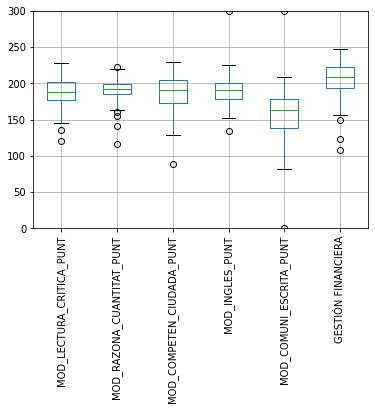

In [ ]:
unal.boxplot()
plt.xticks(rotation=90)
plt.axis(ymin=0, ymax= 300)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


(0.5, 6.5, 0.0, 300.0)

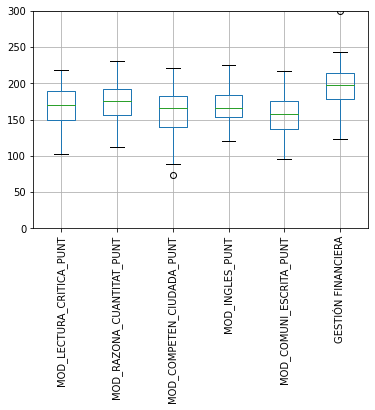

In [ ]:
ujav.boxplot()
plt.xticks(rotation=90)
plt.axis(ymin=0, ymax= 300)

**Estadisticas sobre universidades**

In [ ]:
unal.describe()

,MOD_LECTURA_CRITICA_PUNT,MOD_RAZONA_CUANTITAT_PUNT,MOD_COMPETEN_CIUDADA_PUNT,MOD_INGLES_PUNT,MOD_COMUNI_ESCRITA_PUNT,GESTIÓN FINANCIERA
count,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000
mean,188.323529,191.058824,186.147059,189.911765,158.529412,205.838235
std,21.457658,18.334278,25.301327,22.807916,37.342493,26.878172
min,120.000000,116.000000,89.000000,134.000000,0.000000,108.000000
25%,177.000000,185.000000,173.500000,178.000000,138.000000,193.500000
50%,188.000000,192.000000,191.000000,191.000000,164.000000,208.500000
75%,202.000000,199.250000,204.250000,200.000000,179.000000,222.250000
max,228.000000,223.000000,230.000000,300.000000,300.000000,247.000000


In [ ]:
ujav.describe()

,MOD_LECTURA_CRITICA_PUNT,MOD_RAZONA_CUANTITAT_PUNT,MOD_COMPETEN_CIUDADA_PUNT,MOD_INGLES_PUNT,MOD_COMUNI_ESCRITA_PUNT,GESTIÓN FINANCIERA
count,74.000000,74.000000,74.000000,74.000000,74.000000,73.000000
mean,167.040541,173.121622,159.702703,168.527027,157.729730,195.068493
std,29.322225,26.968248,30.623534,21.406197,26.829904,29.830227
min,103.000000,112.000000,74.000000,121.000000,96.000000,123.000000
25%,150.250000,156.000000,140.000000,154.250000,137.000000,178.000000
50%,170.000000,175.500000,165.500000,166.500000,158.500000,198.000000
75%,189.000000,192.000000,182.500000,183.750000,176.250000,215.000000
max,219.000000,231.000000,222.000000,225.000000,217.000000,300.000000


**Histogramas**

In [ ]:
import seaborn as sns

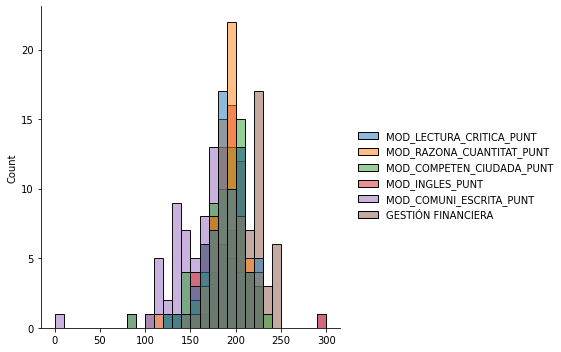

In [ ]:
sns.displot(unal, bins=30)

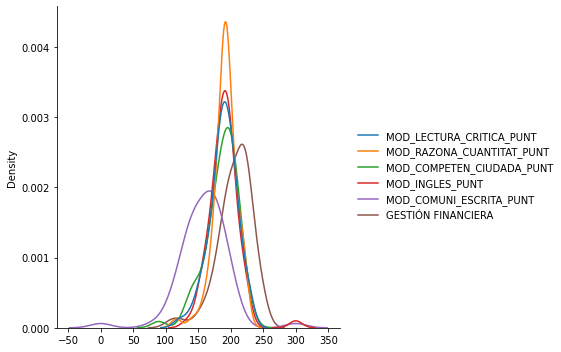

In [ ]:
sns.displot(unal, kind="kde")

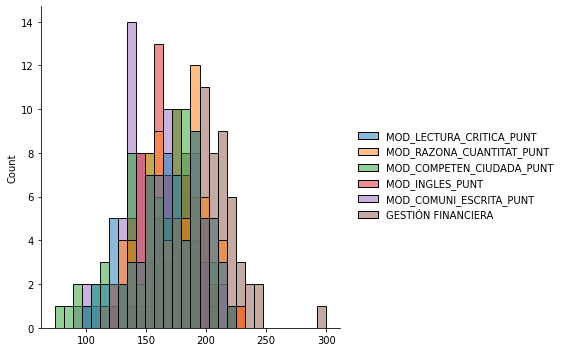

In [ ]:
sns.displot(ujav, bins=30)

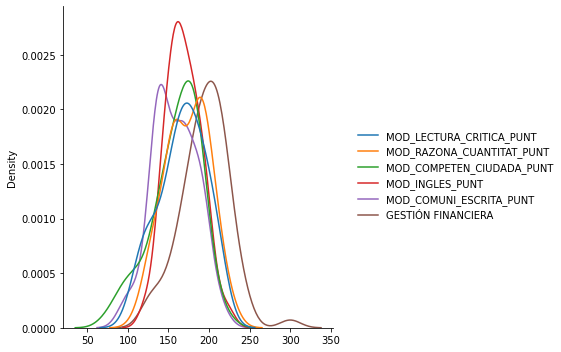

In [ ]:
sns.displot(ujav, kind="kde")

**Conclusiones**


* En general las puntuaciones de los estudiantes de contaduria de la Universidad Nacional sede Bogotá fueron superiores a los de los estudiantes de contaduria de la Universidad Javeriana sede Bogotá
* Las puntuaciones de la prueba especifica de gestión financiera fueron superiores a las pruebas genericas para los estudiantes de ambas universidades
* La puntuacion promedio de la prueba generica de ingles fue la unica en donde los estudiantes de contaduria de la Universidad Javeriana sede Bogotá fueron superiores a los estudiantes de contaduria de la Universidad Nacional sede Bogotá.
* También sorprende que las cajas en los boxplot de los estudiantes de contaduria de la Universidad Nacional sede Bogotá son un poco mas pequeñas y los bigotes son mas cercanos comparados con los de los estudiantes de contaduria de la Universidad Javeriana sede Bogotá, del mismo modo la desviación estandard en general es menor para los estudiantes de la Univerdad Nacional

